# This program will examine the different factors that are related to a student's test score. 

#### Importing the necessary libraries. 

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
from matplotlib import pyplot as plt, figure
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [2]:
# Creating the data frame
students=pd.read_csv(os.path.join(os.getcwd(), "StudentsPerformance.csv"))
avgScores=pd.concat([students["math score"], students["reading score"], students["writing score"]], axis=1)
students['mean'] = avgScores.mean(axis=1)#This line is from https://stackoverflow.com/questions/33750326/compute-row-average-in-pandas
students

gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  \
0                      none          72             72             74   
1                 completed          69             90             88   
2                      none          90             95             93   
3                      none          47             57             44   
4                      none          76             78             75   
..                      ...         ...            ...            ...   
995               completed          88             99             95   
996                    none          62             55             55   
997               completed          59             71             65   
998               completed          68             78             77   
999                    none          77             86             86   

          mean  
0    72.666667  
1    82.333333  
2    92.666667  
3    49.333333  
4    76.333333  
..         ...  
995  94.000000  
996  57.333333  
997  65.000000  
998  74.333333  
999  83.000000  

[1000 rows x 9 columns]

# Part 1: Examining the Data

# Before going any further, it would be wise to examine the distribution of test scores in each subject. 
## The most common test score in math was 65%, in reading 72%, and in writing 74%.

Text(0.04, 0.5, 'Frequency')

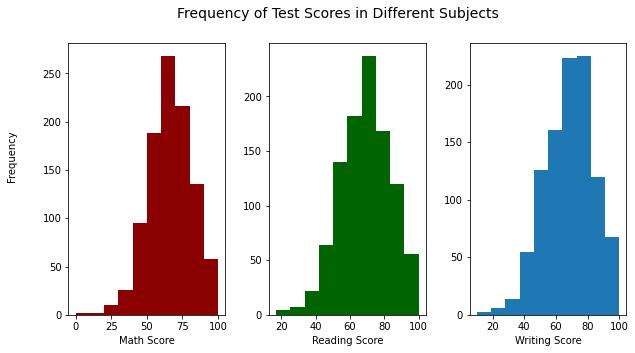

In [3]:
fig, axs = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(10)

math_hist,reading_hist,writing_hist=students['math score'].hist(color="#8B0000",ax=axs[0]), students['reading score'].hist(color="#006400",ax=axs[1]),students['writing score'].hist(ax=axs[2])

math_hist.set_xlabel("Math Score")
reading_hist.set_xlabel("Reading Score")
writing_hist.set_xlabel("Writing Score")

math_hist.grid(None)
reading_hist.grid(None)
writing_hist.grid(None)

fig.suptitle("Frequency of Test Scores in Different Subjects", fontsize=14)
plt.subplots_adjust(wspace=.28) 
fig.text(0.04, 0.5, 'Frequency', rotation="vertical") 


# Now that we know the distribution of test scores, we can begin looking at the factors that affect them. For starters, we can view the relationship between a parent's level of education and their child's test scores.
## When a parent has gone to college, especially when they earn a degree, the student's test score increases across subjects. 

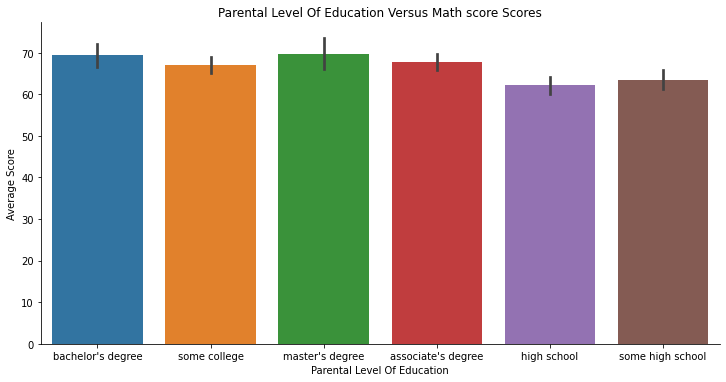

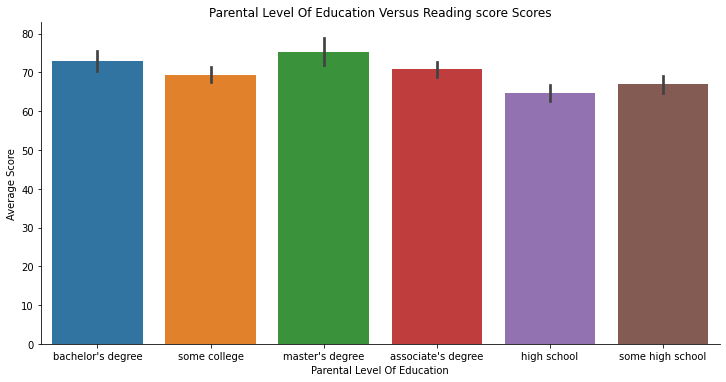

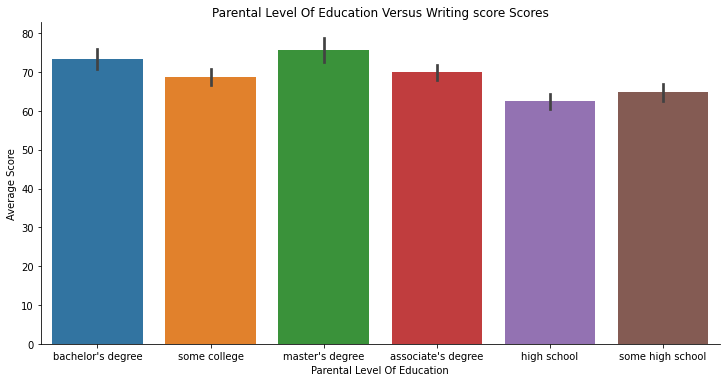

In [4]:
def catPlotMaker(subject,xcor):  
    edu=sns.catplot(x=xcor, y=subject, kind="bar", data=students, aspect=2)
    edu.ax.set_title(xcor.title()+" Versus " + subject.capitalize() +  " Scores")
    edu.ax.set_xlabel(xcor.title())
    edu.ax.set_ylabel("Average Score")
    return (edu)

catPlotMaker ("math score","parental level of education")
catPlotMaker ("reading score","parental level of education")
catPlotMaker ("writing score","parental level of education")
#These cat plots are not mapped onto subplots, as cat plots do not allow for assigning target axes.

# Next, we can examine the relationship between the type of lunch a student consumes and their test store. 
## Students with standard lunches on average tend to do better across the board compared to their peers with free/reduced lunches.

Text(0.5, 0.98, 'Type of Lunch vs Test Scores')

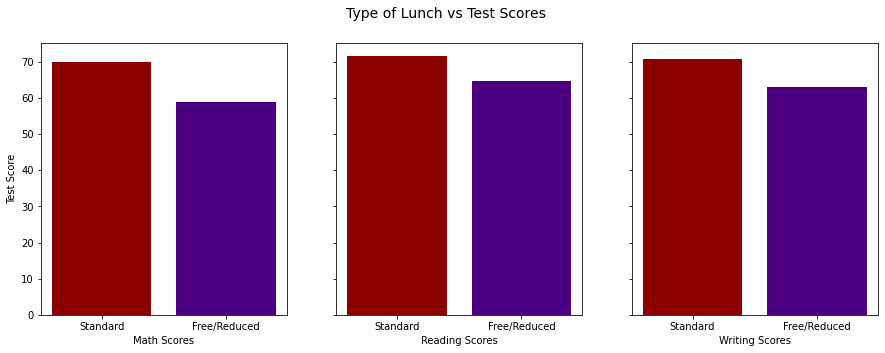

In [5]:
standard=students[students["lunch"]=="standard"]
free_reduced=students[students["lunch"]=="free/reduced"]
plt.subplots(1, 3, sharey=True, figsize=(15,5))
plt.subplot(1, 3, 1)
plt.bar(
   ["Standard", "Free/Reduced"],[standard["math score"].mean(), free_reduced["math score"].mean()],
    color=["#8B0000","indigo"]) #This creates a bar plot displaying the average math test score for students with free/reduced versus standard lunches.
plt.xlabel('Math Scores')
plt.ylabel('Test Score')
plt.subplot(1, 3, 2) #This tells the program which of the three columns to plot the next graph on. 
plt.bar(
   ["Standard", "Free/Reduced"],[standard["reading score"].mean(), free_reduced["reading score"].mean()],
    color=["#8B0000","indigo"])
plt.xlabel('Reading Scores')
plt.subplot(1, 3, 3)
plt.bar(
   ["Standard", "Free/Reduced"],[standard["writing score"].mean(), free_reduced["writing score"].mean()],
    color=["#8B0000","indigo"])
plt.xlabel('Writing Scores')
#The code above is from https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html
plt.suptitle("Type of Lunch vs Test Scores", fontsize=14)



# Lastly, we can look at the relationship between race/ethnicity and gender versus test scores.
## For gender, the relationship depends on the subject. In math, males tend to do better on average, but in writing and reading, females tend to get higher scores. 
## For race/ethnicity, students from groups D and E tend to do the best, students from group A tend to do the worst, and students from groups B and C are in the middle. 

In [6]:
def boxPlot(ycor,title,num):
    subject_BP=sns.boxplot(x="race/ethnicity",y=ycor,hue="gender",data=students, ax=axs[num])#This creates a where ycor is the subject being examined and num is the position of axis being plotted on.
    subject_BP.axes.set_title(title,fontsize=50)
    subject_BP.set_xlabel("Race/Ethnicity",fontsize=30)
    subject_BP.set_ylabel("Average Score",fontsize=30)
    subject_BP.tick_params(labelsize=30)
    #The code above iis from https://stackoverflow.com/questions/36220829/fine-control-over-the-font-size-in-seaborn-plots-for-academic-papers/36222162
    plt.setp(subject_BP.get_legend().get_texts(), fontsize='32') #This sets the legend's size.
    plt.setp(subject_BP.get_legend().get_title(), fontsize='42') #This sets the title's size.
    #The code above is from from https://stackoverflow.com/questions/44880444/how-to-increase-the-font-size-of-the-legend-in-my-seaborn-plot. 
    return subject_BP


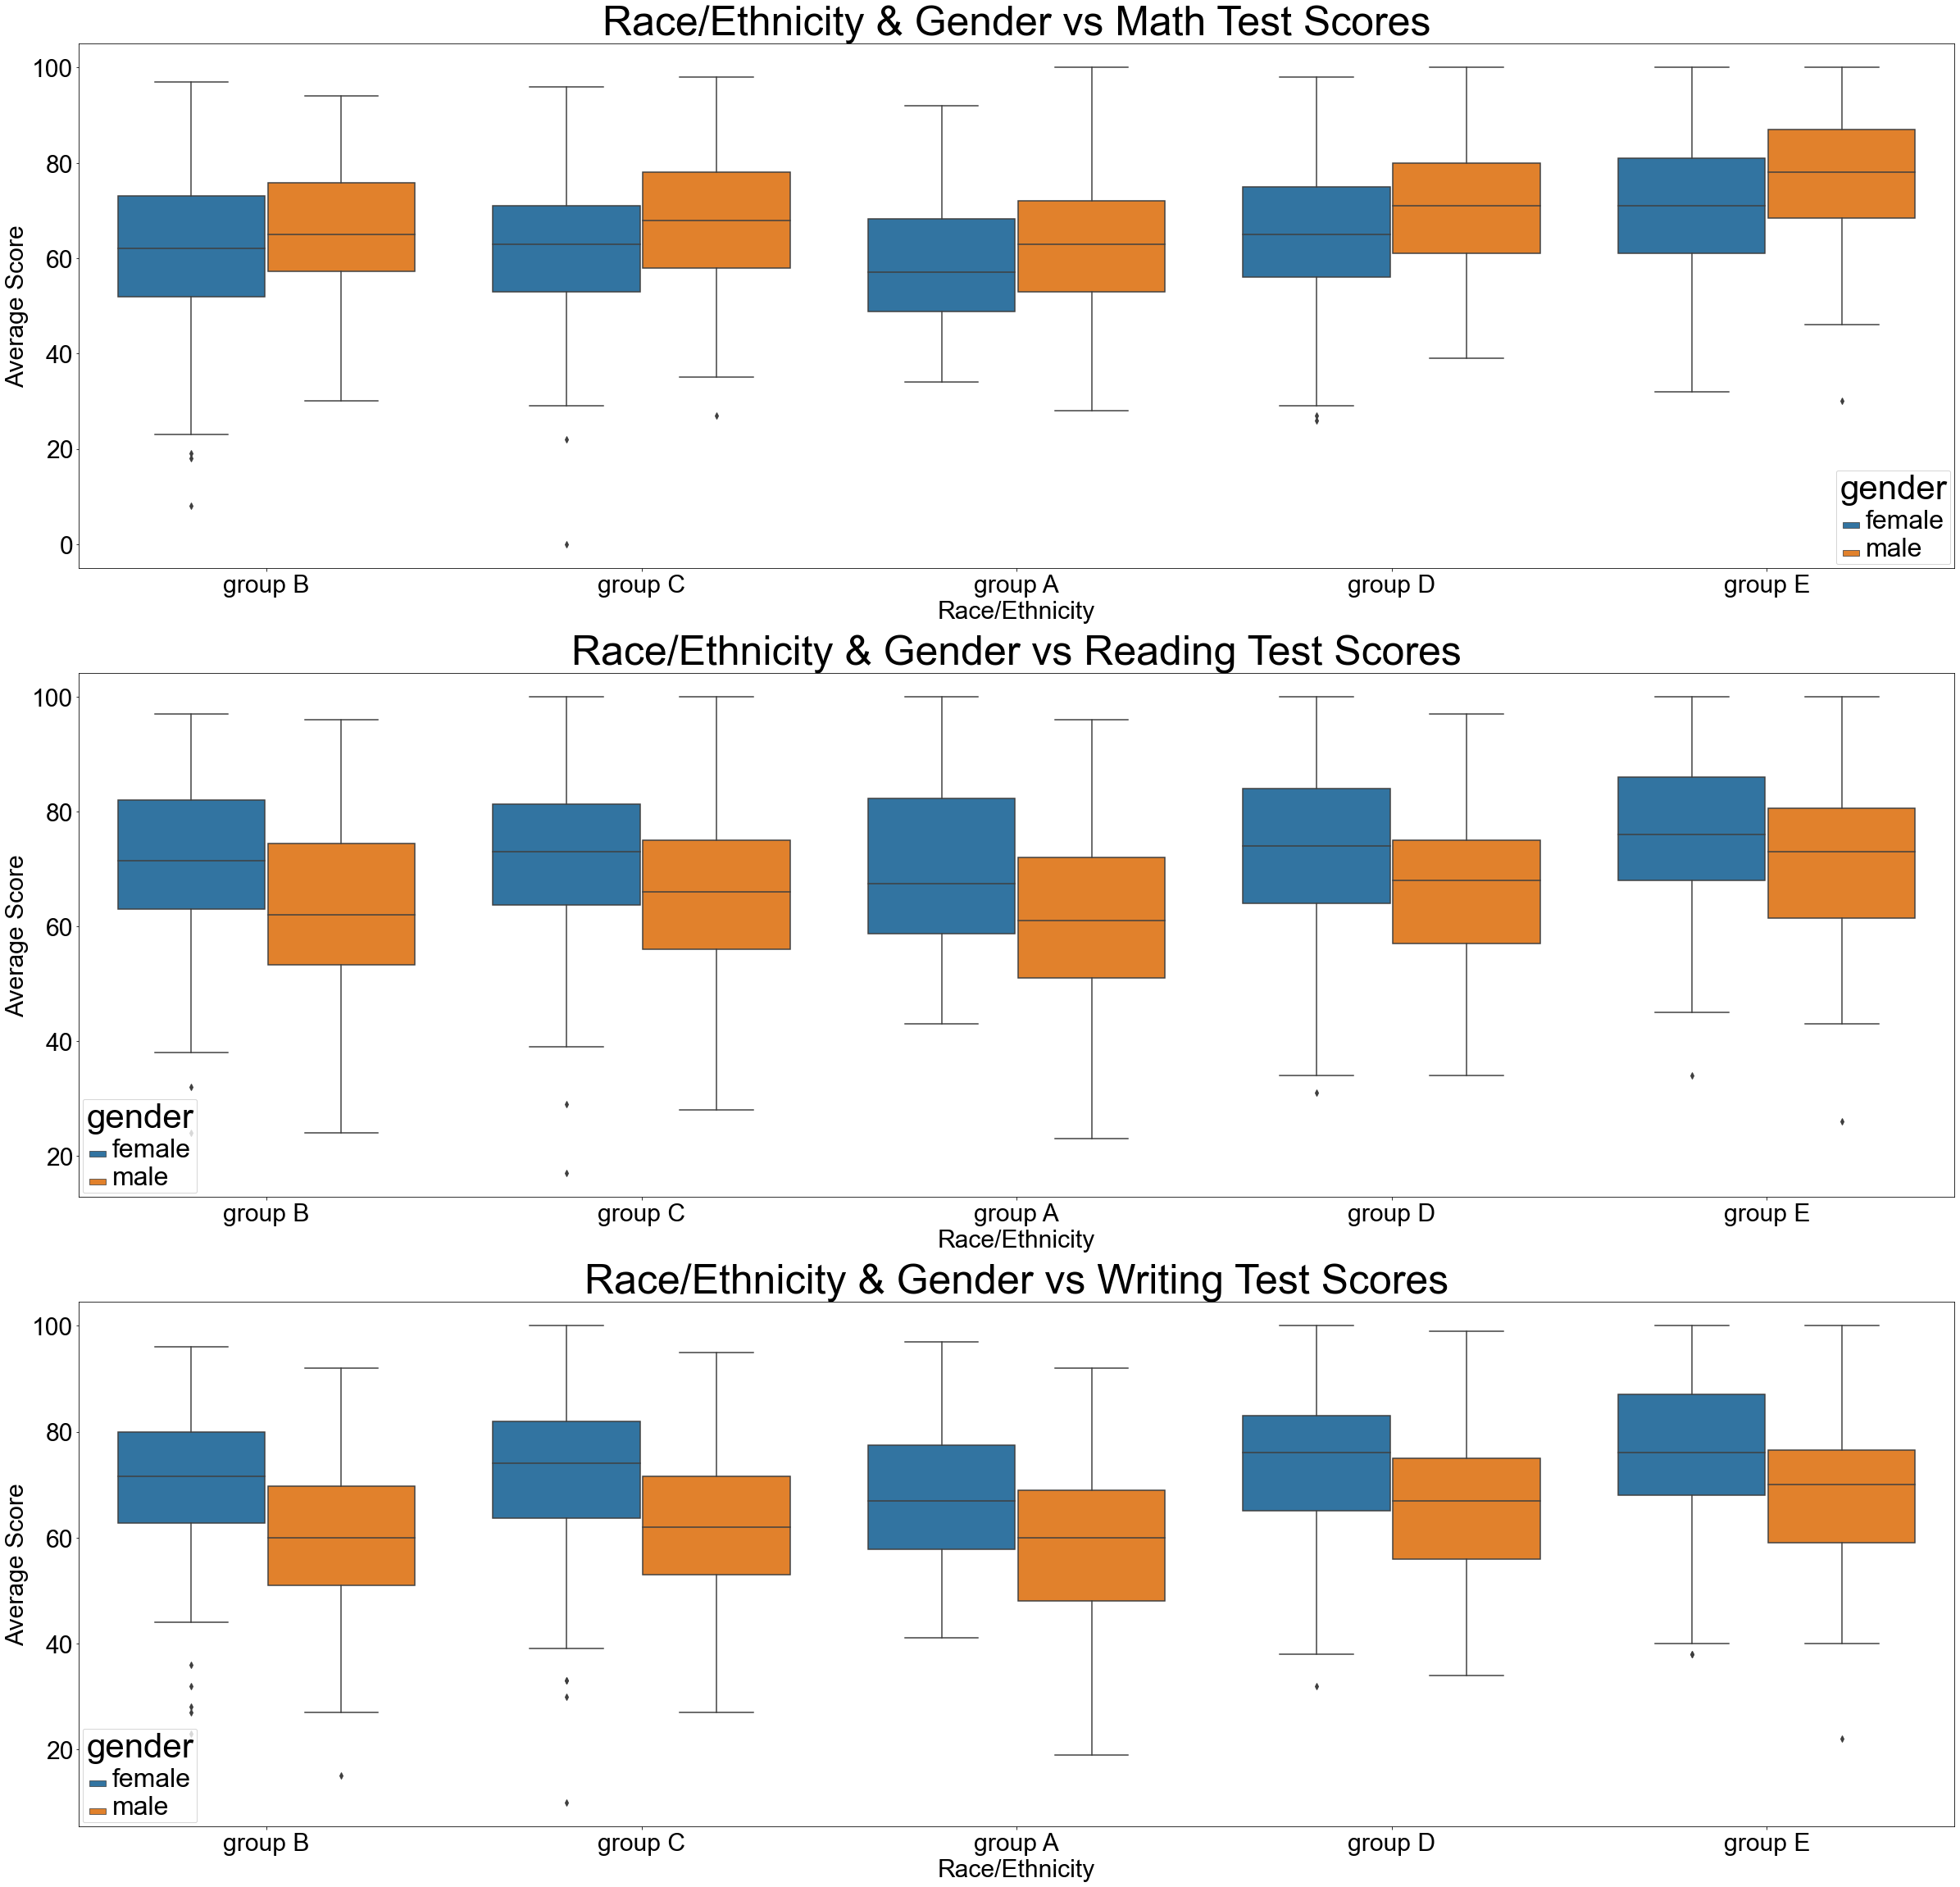

In [7]:
fig, axs = plt.subplots(3, 1, figsize=(41,40))
boxPlot("math score", 
        "Race/Ethnicity & Gender vs Math Test Scores",0)
boxPlot("reading score", 
        "Race/Ethnicity & Gender vs Reading Test Scores",1)
boxPlot("writing score", 
        "Race/Ethnicity & Gender vs Writing Test Scores",2)
sns.set(rc={'figure.figsize':(41.7,40.27)}) #This sets the size of the figure.

# Part 2: Making Predictions

### I will be using decision trees to make predictions about how well a student will do given specific circumstances based on the data. 
    Most of the following code and documentation I will be using is from a webinar hosted by StatQuest: https://www.youtube.com/watch?v=q90UDEgYqeI&ab_channel=StatQuestwithJoshStarmer
    
    While the code and documentation is largely similar, I applied it to a different dataset from that of the video and made edits when necessary to fit my dataset. For instance, my initial decision tree was much larger than that of StatQuest. As a result, I changed the code to make the program download the image so that the user can zoom in and read the tree. 

In [8]:
X=students.drop(["math score",'reading score','writing score','mean'], axis=1) #Making a new copy of the columns that will be used to make predictions
y=students["mean"].copy()# Making a new copy of the column of data I will try to predict.


In [9]:
#I will now be using One-Hot Encoding to categorize the data. 
X_encoded=pd.get_dummies(X,columns=["race/ethnicity","parental level of education"])

#I will be using a label encoder for items like lunch, gender, etc. where there are only two values. The label encoder will simply give a binary value for the categories.
LE=LabelEncoder() #Creating a LabelEncoder object and using that to encode test preparation, gender, and lunch.
X_encoded["test preparation course"]=LE.fit_transform(students["test preparation course"])
X_encoded['gender'] = LE.fit_transform(students['gender'])
X_encoded['lunch'] = LE.fit_transform(students['lunch'])


In [10]:
# I will now encode the y values, assigning a binary value based on whether each student's test score is above or below 75%.
above=y>=70
below=y<70
y[above]=1
y[below]=0


In [11]:
# I will now create a preliminary classification tree.
X_train,X_test,y_train,y_test=train_test_split(X_encoded, y) #Spliting the data into training and testing datasets.
clf_dt=DecisionTreeClassifier() #Creating a decision tree classifier object.
clf_dt=clf_dt.fit(X_train,y_train)#Fitting the training data to the decision tree.


## Given the size of the decision tree, a copy of the output will be saved as a .png file in the same directory as this notebook file. It is recommended that the viewer opens the .png file to zoom in and read the tree. 

### Key to the decision tree:
    Lunch<0.5=Free/Reduced Lunch, Lunch>0.5=Standard Lunch
    Test Prepartion<0.5=Completed, Test Preparation>0.5=None
    Gender<0.5=Female, Gender>0.5=Male
    Race/Ethnicity<0.5=Does not belong to that race/ethnicity, Test Preparation>0.5=Does belong to that race/ethnicity
    Parental Level of Education<0.5=Parent is not at this level, Parental Level of Education>0.5=Parent is at this level 

### The dataset will be split into two sections: training and testing data. The program will use the training data to create the decision tree and the testing data to observe its accuracy.

In [12]:
plt.figure(figsize=(25,15.5), dpi=1000) #Creating a figure to plot the decision tree on
out = tree.plot_tree(clf_dt, #Plotting the decision tree
                    filled=True,
                    rounded=True,
                    class_names=["Above 70", "Below 70"],
                    feature_names=X_encoded.columns) 
#The code I used below for changing the attributes of the lines is from https://stackoverflow.com/questions/62318367/decision-tree-edges-branches-so-light-that-are-invisible.
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(.25)
plt.savefig('Preliminary Decision Tree') #Saving the tree as an image file.


## Since this decision tree is based on the training data, I will now use it on the testing data to see how accurate it is at making predictions.

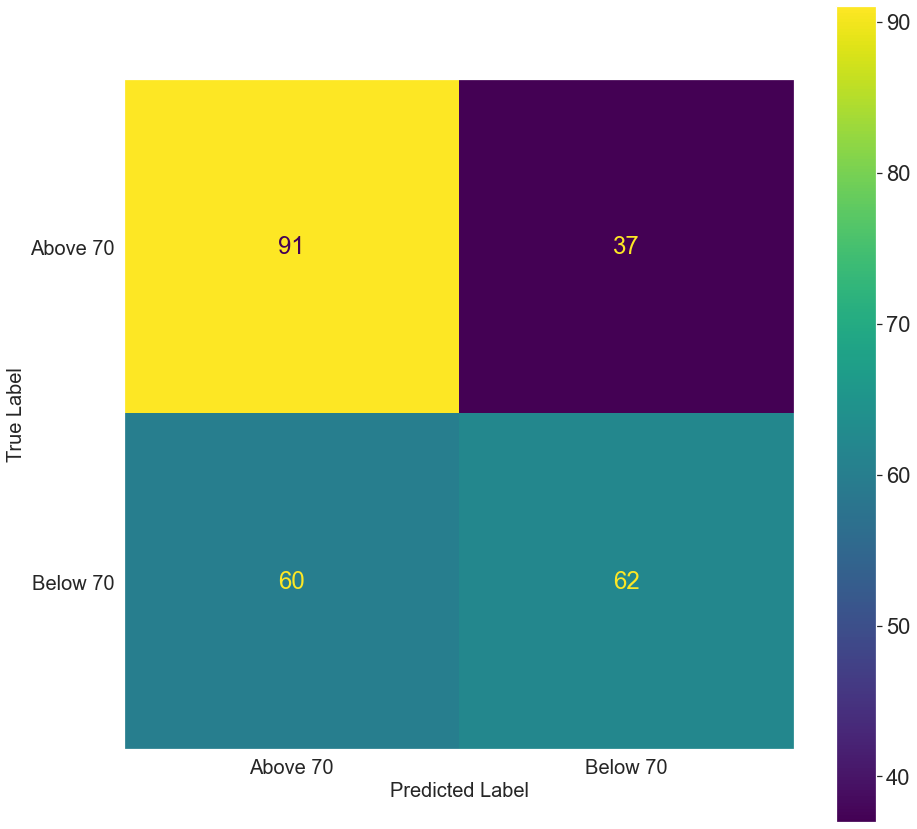

In [13]:
fig, CM_ax = plt.subplots(figsize=(15, 15))
sns.set(font_scale=2)
CM=plot_confusion_matrix(clf_dt,X_test,y_test,display_labels=["Above 70", "Below 70"],ax=CM_ax) #Creating a confusion matrix based on its predictions.
plt.grid(False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("True Label",fontsize=20)
plt.xlabel("Predicted Label", fontsize=20)
sns.set(font_scale=2)
TP=CM.confusion_matrix[0][0] #Obtaining the number of true positives.
FP=CM.confusion_matrix[0][1] #Obtaining the number of false positives.
TN=CM.confusion_matrix[1][1] #Obtaining the number of true negatives.
FN=CM.confusion_matrix[1][0] #Obtaining the number of false negatives.
total=TP+FP+TN+FN #Calculating the total
accuracy=round(((TP+TN)/total)*100,2);misclassification= round(((FP + FN)/total)*100,2);precision=round((TP/(TP + FP))*100,2);sensitivity=round((TP /( TP + FN))*100,2);specificity=round((TN / (TN + FP))*100,2)


# When put up against the testing dataset, the decision tree does well. However, the model may overfit the training dataset, so I will try pruning leaves to see if that yields better results. 
    I will do this by comparing decision trees with different numbers of leaves pruned. I will decide which tree is the best by comparing their sum of squared residuals (SSRs). This is a measure of how accurately each decision tree makes predictions with the training dataset. The decision tree with the most leaves (our current tree) will do best, as it was created using the training set. However, as aforementioned, this tree may have overfitted the training dataset which means that it may perform worse than trees with fewer leaves (and less fitted to the training dataset) when put up against the testing dataset. This is a case of sacrificing generalizability for accuracy. To avoid this issue, I will apply the value alpha to the SSR of each decision tree. Alpha is a 'penalty' based on the number of leaves each tree has. Alpha raises the SSR of a tree. As a result, the more leaves it has (IE the more fitted the tree is to the training dataset), the bigger the 'penalty' will be, and consequently the higher the SSR (a worse score) the tree will receive. However, we do not know what the optimal value for alpha is. The code in the next few cells will figure this out.
    One finds alpha manually by making a decision tree with all the leaves (our current tree) and calculating its SSR. Pruning the leaves of a decision node will yield a larger SSR with the training dataset, which is why we apply alpha. The user must calculate the minimum value for alpha (the 'penalty') to make our current tree yield a higher SSR than a tree with nodes removed. In other words, the user calculates how high alpha must be to justify pruning the leaves of one node, and then another, and then another until there are no more nodes left. The user will now have a list of values for alpha, and a list of possible decision trees. They will then test decision trees against the testing dataset to see which one has the smallest SSR (best score). 

## First, we must gather alpha's values.

In [14]:
path=clf_dt.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas=path.ccp_alphas #ccp=Cost Complexity Pruning
ccp_alphas=ccp_alphas[:-1] #Excluding alpha's maximum value, as this would be when there are no nodes left.
clf_dts=[] #This list will hold all the decision trees with their values for alpha.
#We will now produce decision trees for each of the ccp_alpha values and store them in theh clf_dts array.
for ccp_alpha in ccp_alphas:
    if ccp_alpha>=0:
        clf_dt=DecisionTreeClassifier(ccp_alpha=ccp_alpha) 
        clf_dt.fit(X_train,y_train)
        clf_dts.append(clf_dt)

### The code below shows how changing the value of alpha affects the accuracy. When the value of alpha (the 'penalty' for more leaves) increases, the size of the decision tree will likely get smaller as more leaves will be pruned (for a more in-depth explanation, please refer to my note above). The decision trees from the clf_dts list above run through the test dataset and their accuracy is then plotted on the graph.

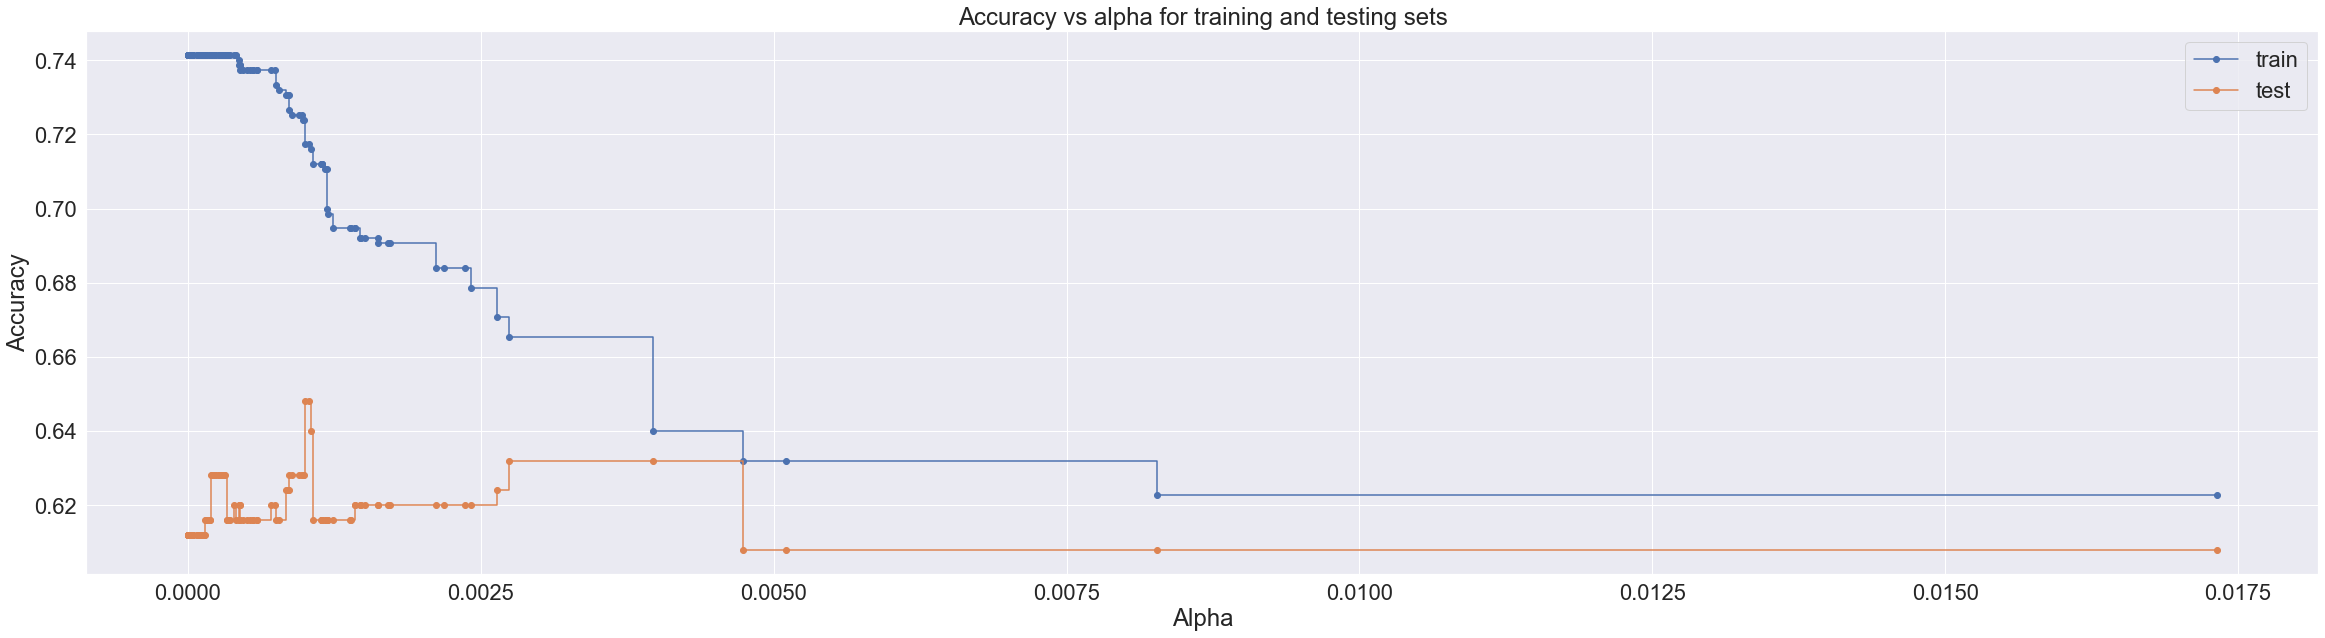

In [15]:
train_scores= [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores=[clf_dt.score(X_test,y_test) for clf_dt in clf_dts]
#The two lines above are running the testing and training datasets for each of the decision trees created in the cell above.

fig, ax= plt.subplots(figsize=(40, 10))
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy") 
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle="steps-post")
ax.legend()
plt.show()

In [16]:
#The following code is designed to find what is currently believed to be the ideal value for alpha.
 
testLine,trainLine=ax.lines[1].get_ydata(), ax.lines[0].get_ydata()#This obtains the all the y coordinates for the test and training lines above.
maxScore=0
maxIndex=0
for index in range(len(testLine)):
    if ((testLine[index]*.75)+(trainLine[index]*.25))>maxScore:#Because the testing data is 75% of the total data and the training data is 25%, I used a weighted average to find the ideal alpha value.
        maxScore=((testLine[index]*.75)+(trainLine[index]*.25))
        maxIndex=index
        curr_ideal_alpha=float("{:.10f}".format(list(ccp_alphas)[index])) #ccp_alphas is a list of all the values of alpha. 
        #Since it is in the same order as the training and test line (in that the 1st entry in ccp_alphas is the value of alpha for the first point in the training and test lines), I can obtain the curr_ideal_alpha by using the index variable.
print ("Currently, the ideal value for alpha is", curr_ideal_alpha, "with a mean accuracy of",str(maxScore)+"%")
        

Currently, the ideal value for alpha is 0.0009989305 with a mean accuracy of 0.6653333333333333%


# Cross validation:
    While we have an ideal value for alpha, we should make sure that it is consistently the best value. We verify this by splitting the dataset into 10 combinations of training and testing. For every combination, we will create a decision tree with the training data, and factor in alpha to find the optimal decision tree. Once that is completed, we can run it against the testing dataset to see how accurate it is. The average accuracy across the 10 combinations will be recorded. The graph below will display how accurate a decision tree is on average when factoring in different values for alpha.

Text(0, 0.5, 'Mean Accuracy')

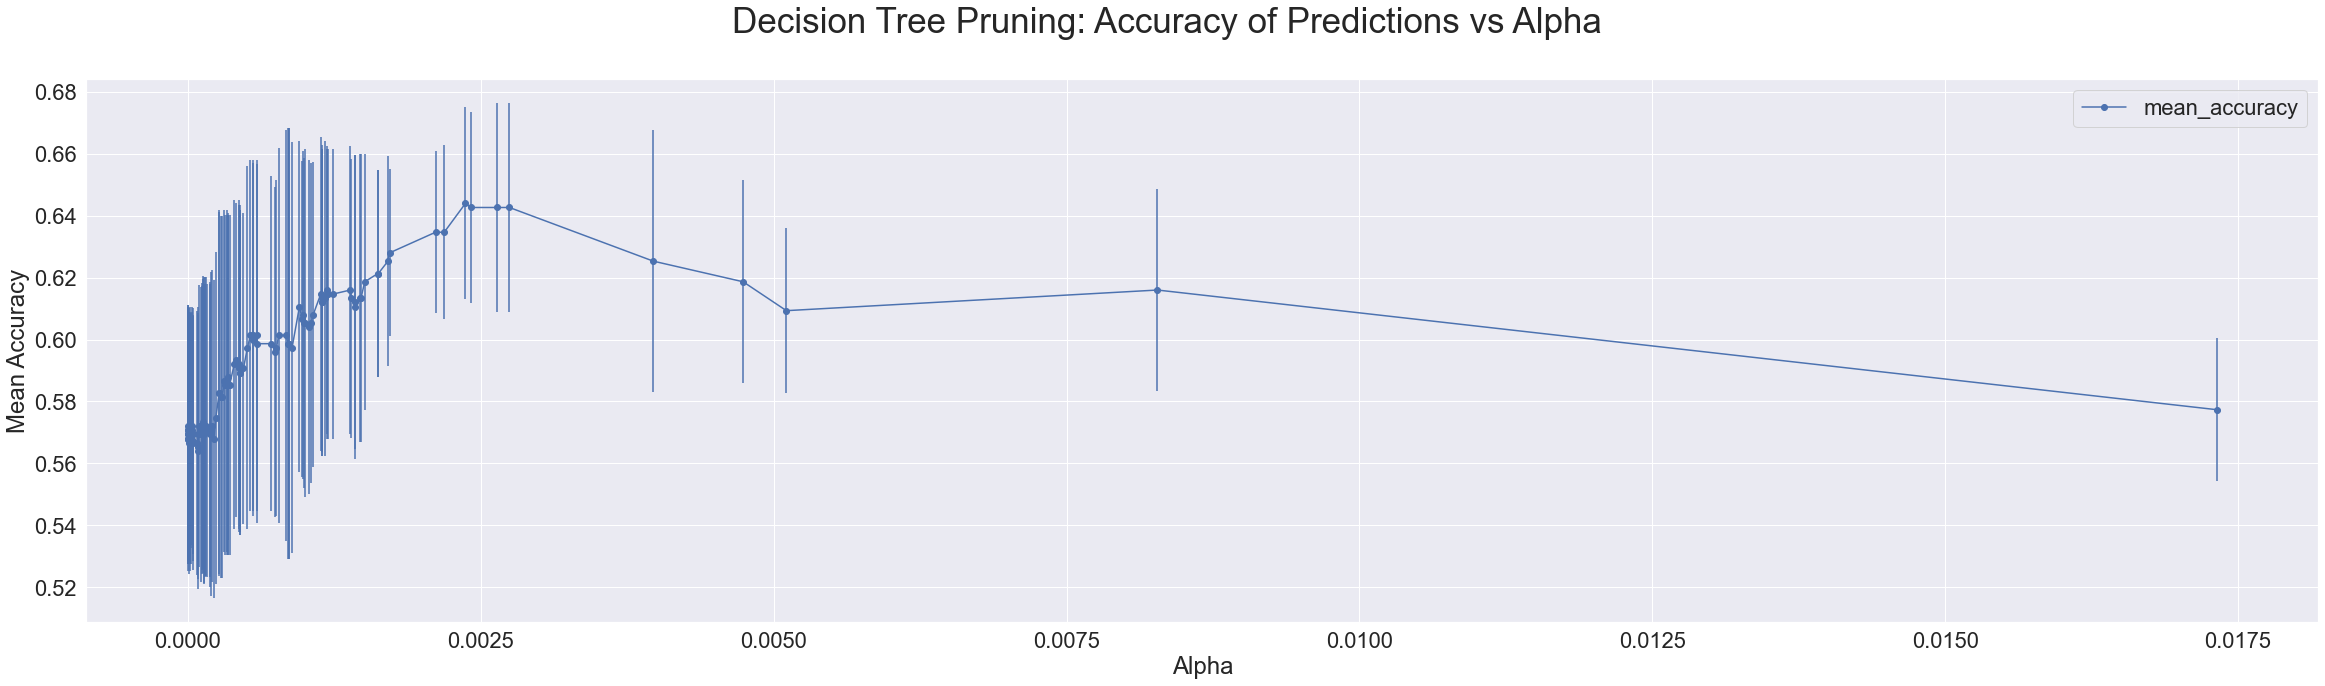

In [17]:
fig, alpha_ax = plt.subplots(figsize=(40, 10))
fig.suptitle('Decision Tree Pruning: Accuracy of Predictions vs Alpha', fontsize=35)
alpha_loop_values=[]
for ccp_alpha in ccp_alphas: #This is going through all of the values of alpha and their respective decision trees. 
    clf_dt=DecisionTreeClassifier(ccp_alpha=ccp_alpha) 
    scores=cross_val_score(clf_dt, X_train, y_train, cv=10)#This finds how well each decision tree did on average at making predictions.
    alpha_loop_values.append([ccp_alpha,np.mean(scores), np.std(scores)])
alpha_results=pd.DataFrame(alpha_loop_values, columns=["alpha","mean_accuracy", "std"])
alpha_plot=alpha_results.plot(x="alpha",y="mean_accuracy", yerr="std", marker="o",ax=alpha_ax)
alpha_plot.set_xlabel("Alpha")
alpha_plot.set_ylabel("Mean Accuracy")


In [18]:
ideal_ccp_alpha=alpha_results.sort_values(by=['mean_accuracy'], ascending=False)#Finding the exact optimal value for alpha.
accuracy=ideal_ccp_alpha.iloc[0]["mean_accuracy"]
ideal_ccp_alpha=float(ideal_ccp_alpha.iloc[0]["alpha"])


In [19]:
if ideal_ccp_alpha==curr_ideal_alpha:
    print ("It seems as though the initial value for alpha has consistently done the best.")
else:
    print ("It seems as though the initial value for alpha did not consistenlty perform the best. Instead, the value of alpha that, on average, did the best job at predicing is:", ideal_ccp_alpha,"with a mean accuracy of",str(accuracy)+"%")
    
    

It seems as though the initial value for alpha did not consistenlty perform the best. Instead, the value of alpha that, on average, did the best job at predicing is: 0.0023692895720814136 with a mean accuracy of 0.644%


# Now that we have the consistently ideal value for alpha, we can create a decision tree with it and see how it compares to our original tree. 

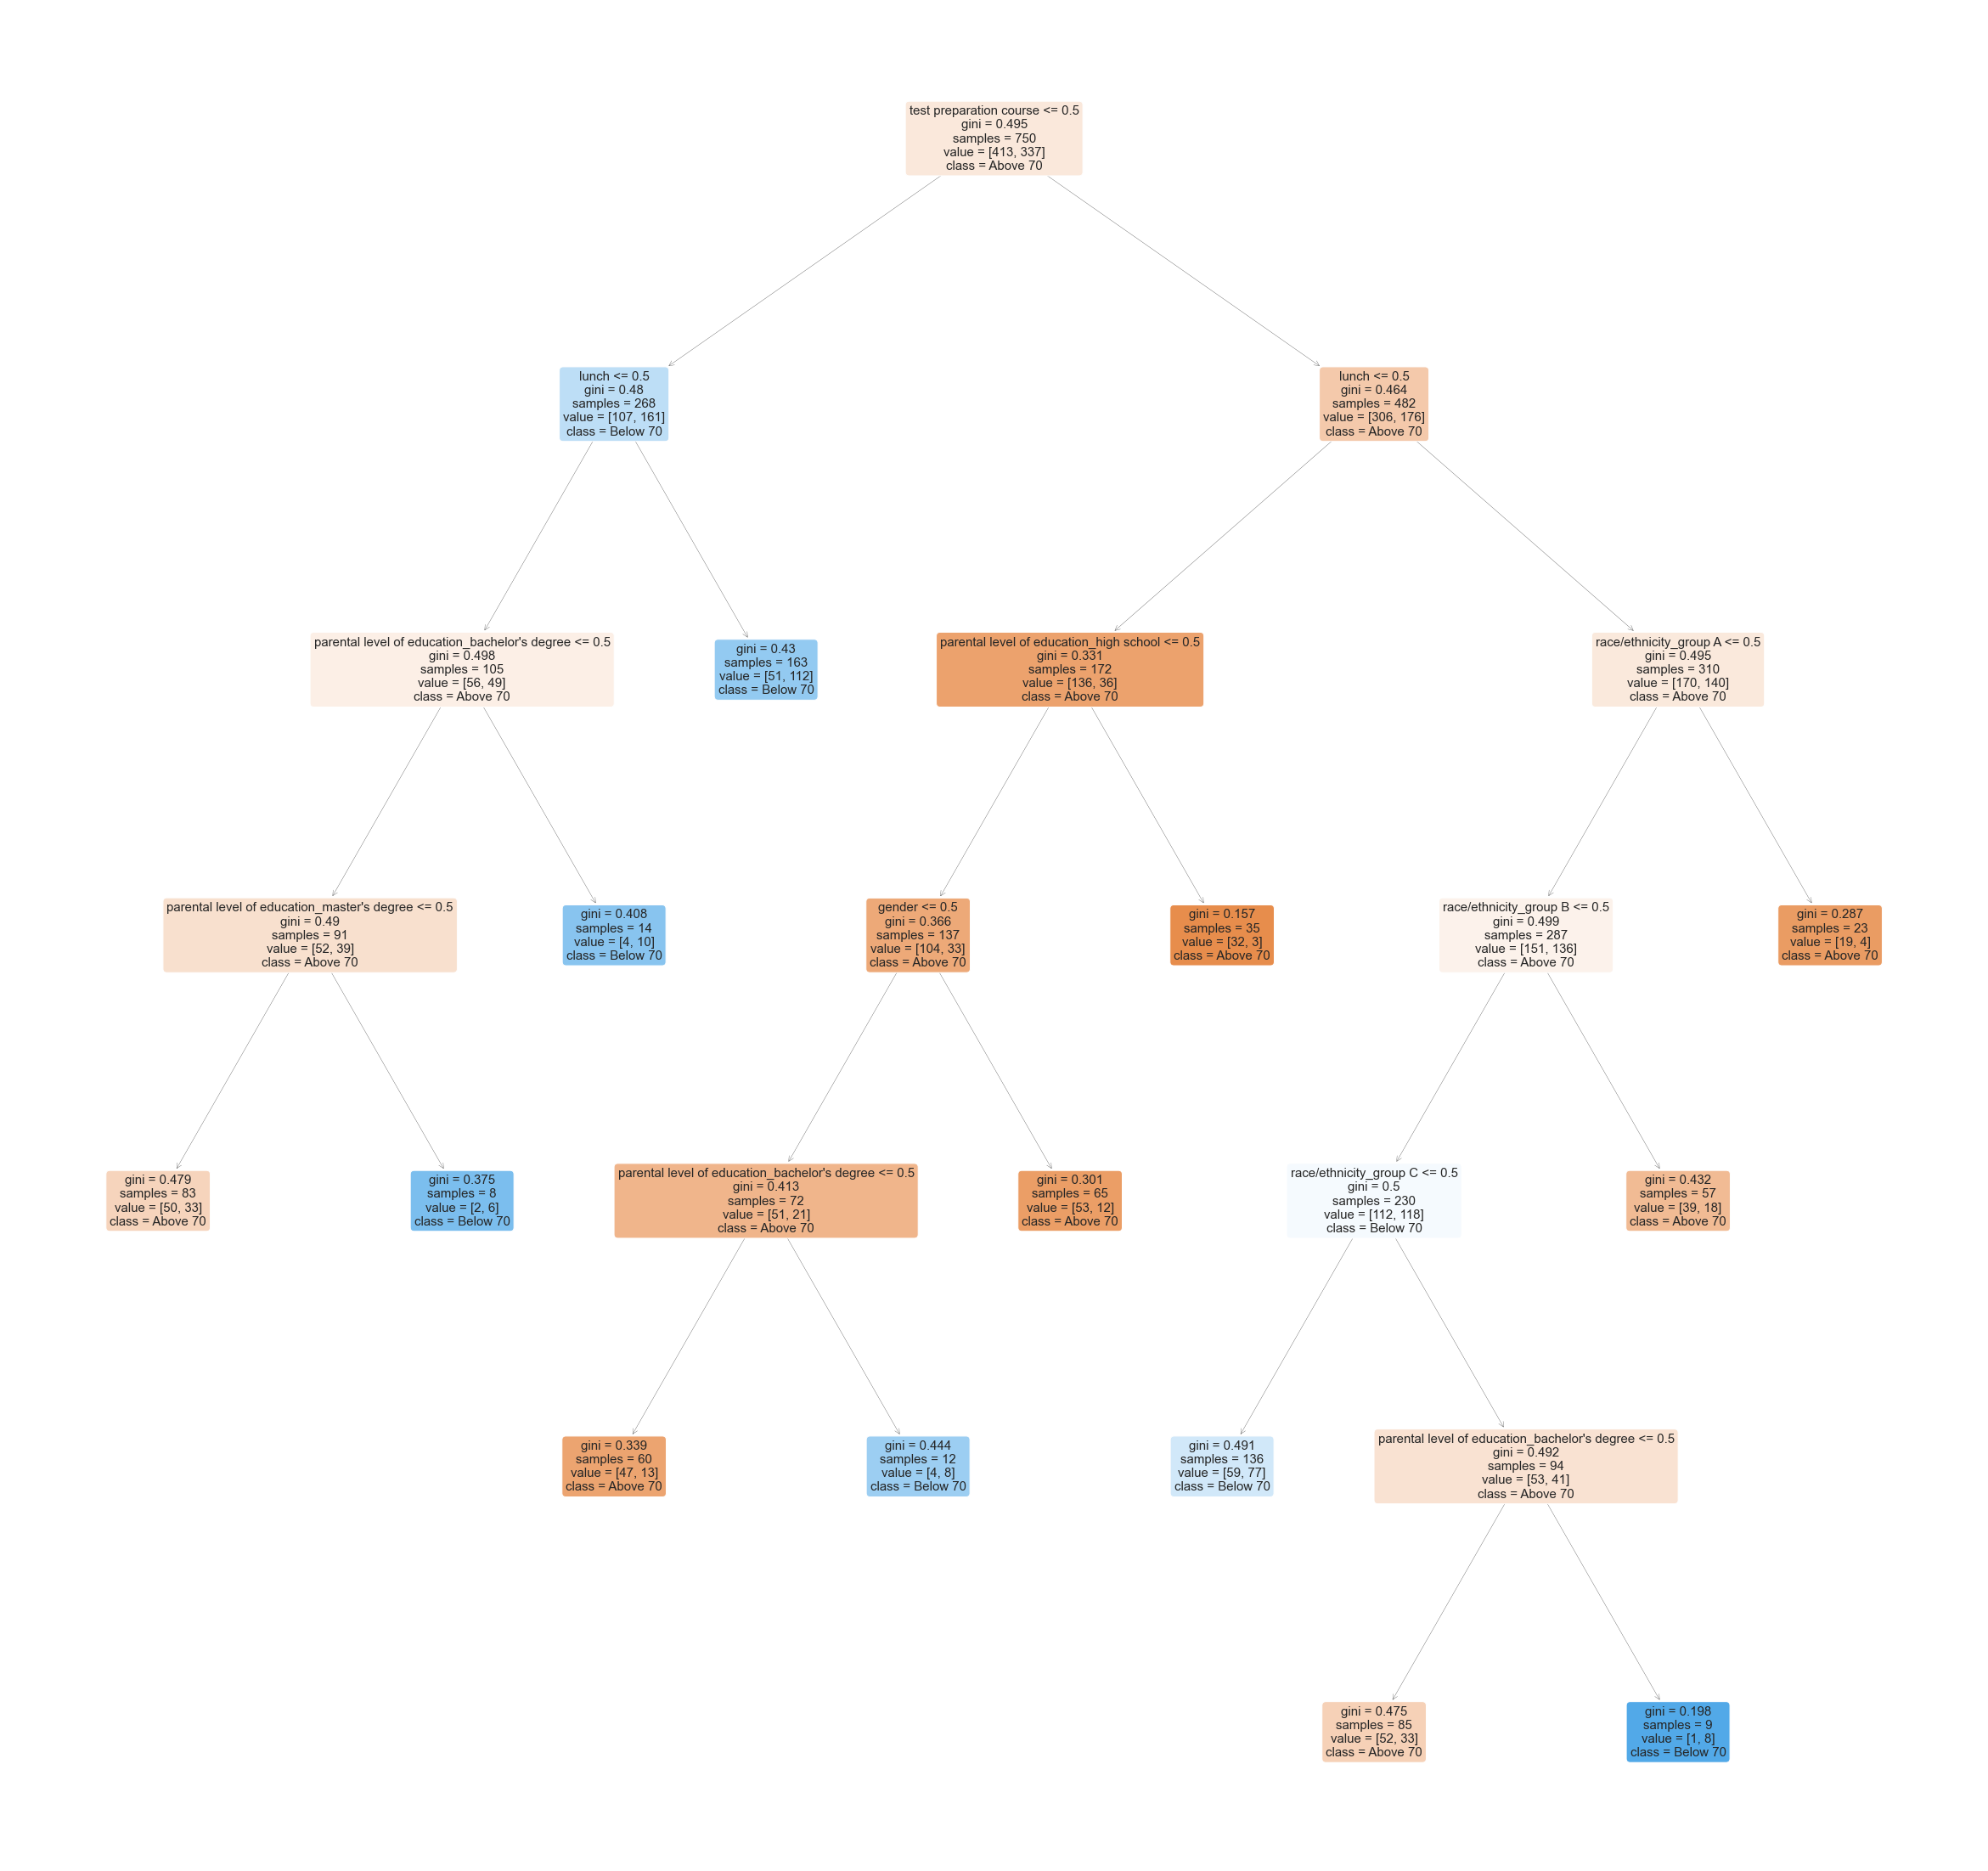

In [20]:
clf_dt_pruned=DecisionTreeClassifier(ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned=clf_dt_pruned.fit(X_train,y_train)
out = tree.plot_tree(clf_dt_pruned,
                    filled=True,
                    rounded=True,
                    class_names=["Above 70", "Below 70"],
                    feature_names=X_encoded.columns) 
#The code I used below for changing the attributes of the lines is from https://stackoverflow.com/questions/62318367/decision-tree-edges-branches-so-light-that-are-invisible.
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(.25)
plt.savefig('Pruned Tree')


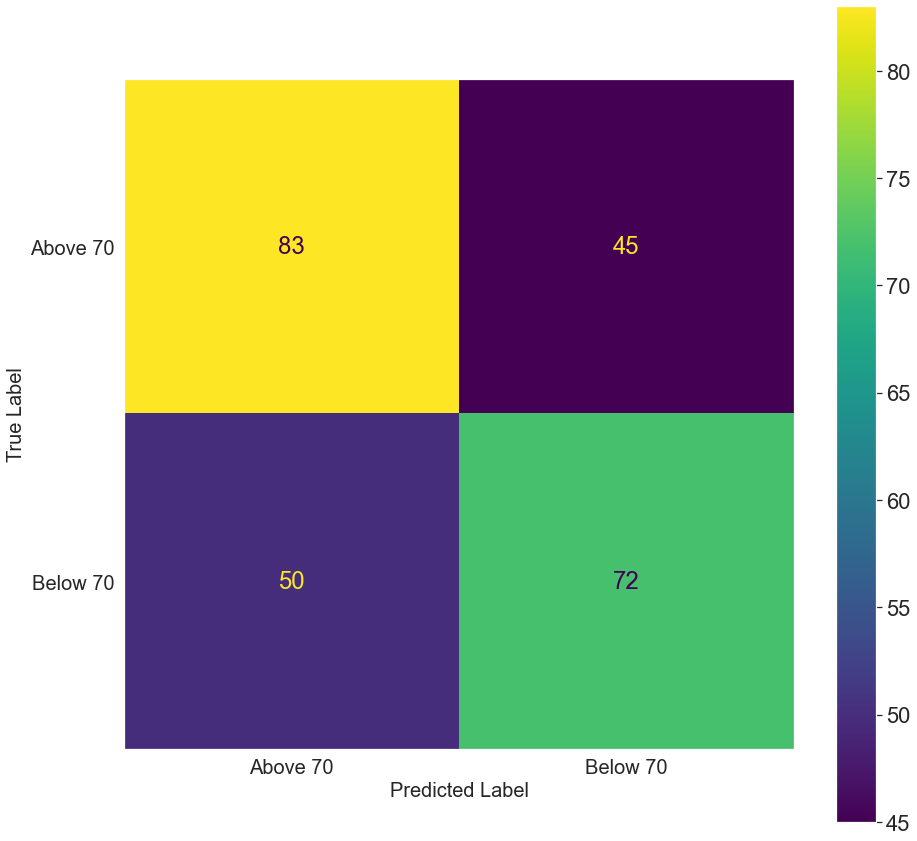

In [21]:
fig, CM2_ax = plt.subplots(figsize=(15, 15))
CM=plot_confusion_matrix(clf_dt_pruned,X_test,y_test,display_labels=["Above 70", "Below 70"],ax=CM2_ax)
plt.grid(False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.set(font_scale=2)
sns.set(font_scale=2)
plt.ylabel("True Label",fontsize=20)
plt.xlabel("Predicted Label", fontsize=20)
TP=CM.confusion_matrix[0][0];FP=CM.confusion_matrix[0][1];TN=CM.confusion_matrix[1][1];FN=CM.confusion_matrix[1][0]
total=TP+FP+TN+FN
pruned_accuracy=round(((TP+TN)/total)*100, 2);pruned_misclassification= round(((FP + FN)/total)*100,2);pruned_precision=round((TP/(TP + FP))*100,2);pruned_sensitivity=round((TP /( TP + FN))*100,2);pruned_specificity=round((TN / (TN + FP))*100,2)


# Conclusion

In [22]:
original_stats={"Accuracy": str(accuracy)+"%", "Misclassification ": str(misclassification)+"%", "Precision ": str(precision)+"%", "Sensitivity ":str(sensitivity)+"%", "Specificity ": str(specificity)+"%"}
pruned_stats= {"Accuracy": str(pruned_accuracy)+"%", "Misclassification ": str(pruned_misclassification)+"%", "Precision ": str(pruned_precision)+"%", "Sensitivity ":str(pruned_sensitivity)+"%", "Specificity ": str(pruned_specificity)+"%"}
print ("The original stats were the following: \n", original_stats,"\n")
print ("After pruning the tree, the stats become the following: \n", pruned_stats)

The original stats were the following: 
 {'Accuracy': '0.644%', 'Misclassification ': '38.8%', 'Precision ': '71.09%', 'Sensitivity ': '60.26%', 'Specificity ': '62.63%'} 

After pruning the tree, the stats become the following: 
 {'Accuracy': '62.0%', 'Misclassification ': '38.0%', 'Precision ': '64.84%', 'Sensitivity ': '62.41%', 'Specificity ': '61.54%'}
